In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use("https://gist.githubusercontent.com/JonnyCBB/c464d302fefce4722fe6cf5f461114ea/raw/64a78942d3f7b4b5054902f2cee84213eaff872f/matplotlibrc")

In [17]:
df = pd.read_csv("theta_k_lambda_table.csv")
df

,θ,k,λ
0,0.4,13,61.584821
1,0.4,9,100.000000
2,0.4,12,61.584821
3,0.4,3,100.000000
4,0.4,12,37.926902


[[<matplotlib.axis.YTick at 0x7f83c61802e8>,
 Text(0.5, 0, 'θ\ntarget fraction observed entries'),
 Text(0, 0.5, '$k$\ndimension of latent space')]

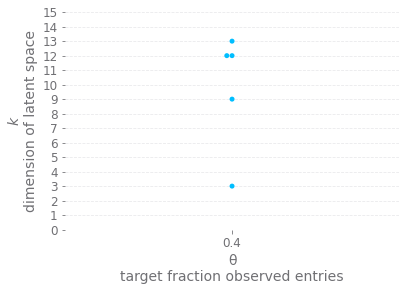

In [27]:
ax = sb.swarmplot(data=df, x="θ", y="k")
ax.set(yticks=[i for i in range(16)], xlabel="θ\ntarget fraction observed entries", ylabel="$k$\ndimension of latent space")

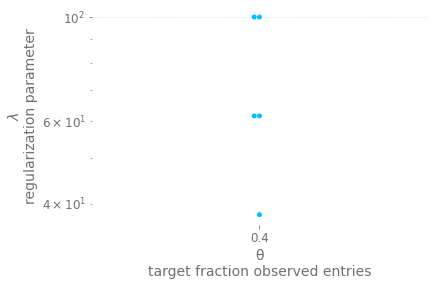

In [19]:
ax = sb.swarmplot(data=df, x="θ", y="λ")
ax.set(xlabel="θ\ntarget fraction observed entries", ylabel="$\lambda$\nregularization parameter")
ax.set_yscale("log")

In [20]:
df_p = pd.read_csv("normalized_props.csv")
df_p.head()

,O$_2$\n298 K\n5 bar,O$_2$\n298 K\n140 bar,CO$_2$\n300 K\n0.001 bar,CO$_2$\n300 K\n30 bar,N$_2$\n300 K\n0.001 bar,N$_2$\n300 K\n30 bar,H$_2$\n77 K\n5 bar,H$_2$\n77 K\n100 bar,H$_2$\n298 K\n5 bar,H$_2$\n298 K\n100 bar,H$_2$O Henry\n300 K,H$_2$S Henry\n300 K,Xe Henry\n300 K,Kr Henry\n300 K,CH$_4$\n298 K\n65 bar,CH$_4$\n298 K\n5.8 bar
0,0.782594,0.227099,1.514963,0.787295,0.928027,0.615974,0.515799,0.183054,0.179256,0.138072,0.643544,2.000030,0.862103,1.338224,0.238057,0.413698
1,-0.345834,-0.137501,-0.262078,-0.403770,-0.468471,-0.347206,-0.252140,-0.134338,-0.169558,-0.135878,-0.553239,-0.194798,0.065301,-0.099299,-0.120977,-0.205089
2,-1.477719,-1.098644,-0.164477,-1.082238,-1.219344,-1.366190,-1.734618,-1.017157,-1.048633,-0.981814,1.686481,0.574774,-0.391555,-1.120223,-1.203811,-1.566760
3,-0.098704,0.013381,-0.039805,0.207683,0.413187,0.309000,0.003914,-0.022077,0.026384,0.016189,0.671730,0.220817,0.062908,0.008153,0.001658,0.116946
4,1.701469,1.390657,-0.045194,2.019726,3.211449,2.342041,3.608981,1.193219,1.001780,0.873118,-0.139798,-0.114153,-0.076071,0.507465,1.774058,2.289785


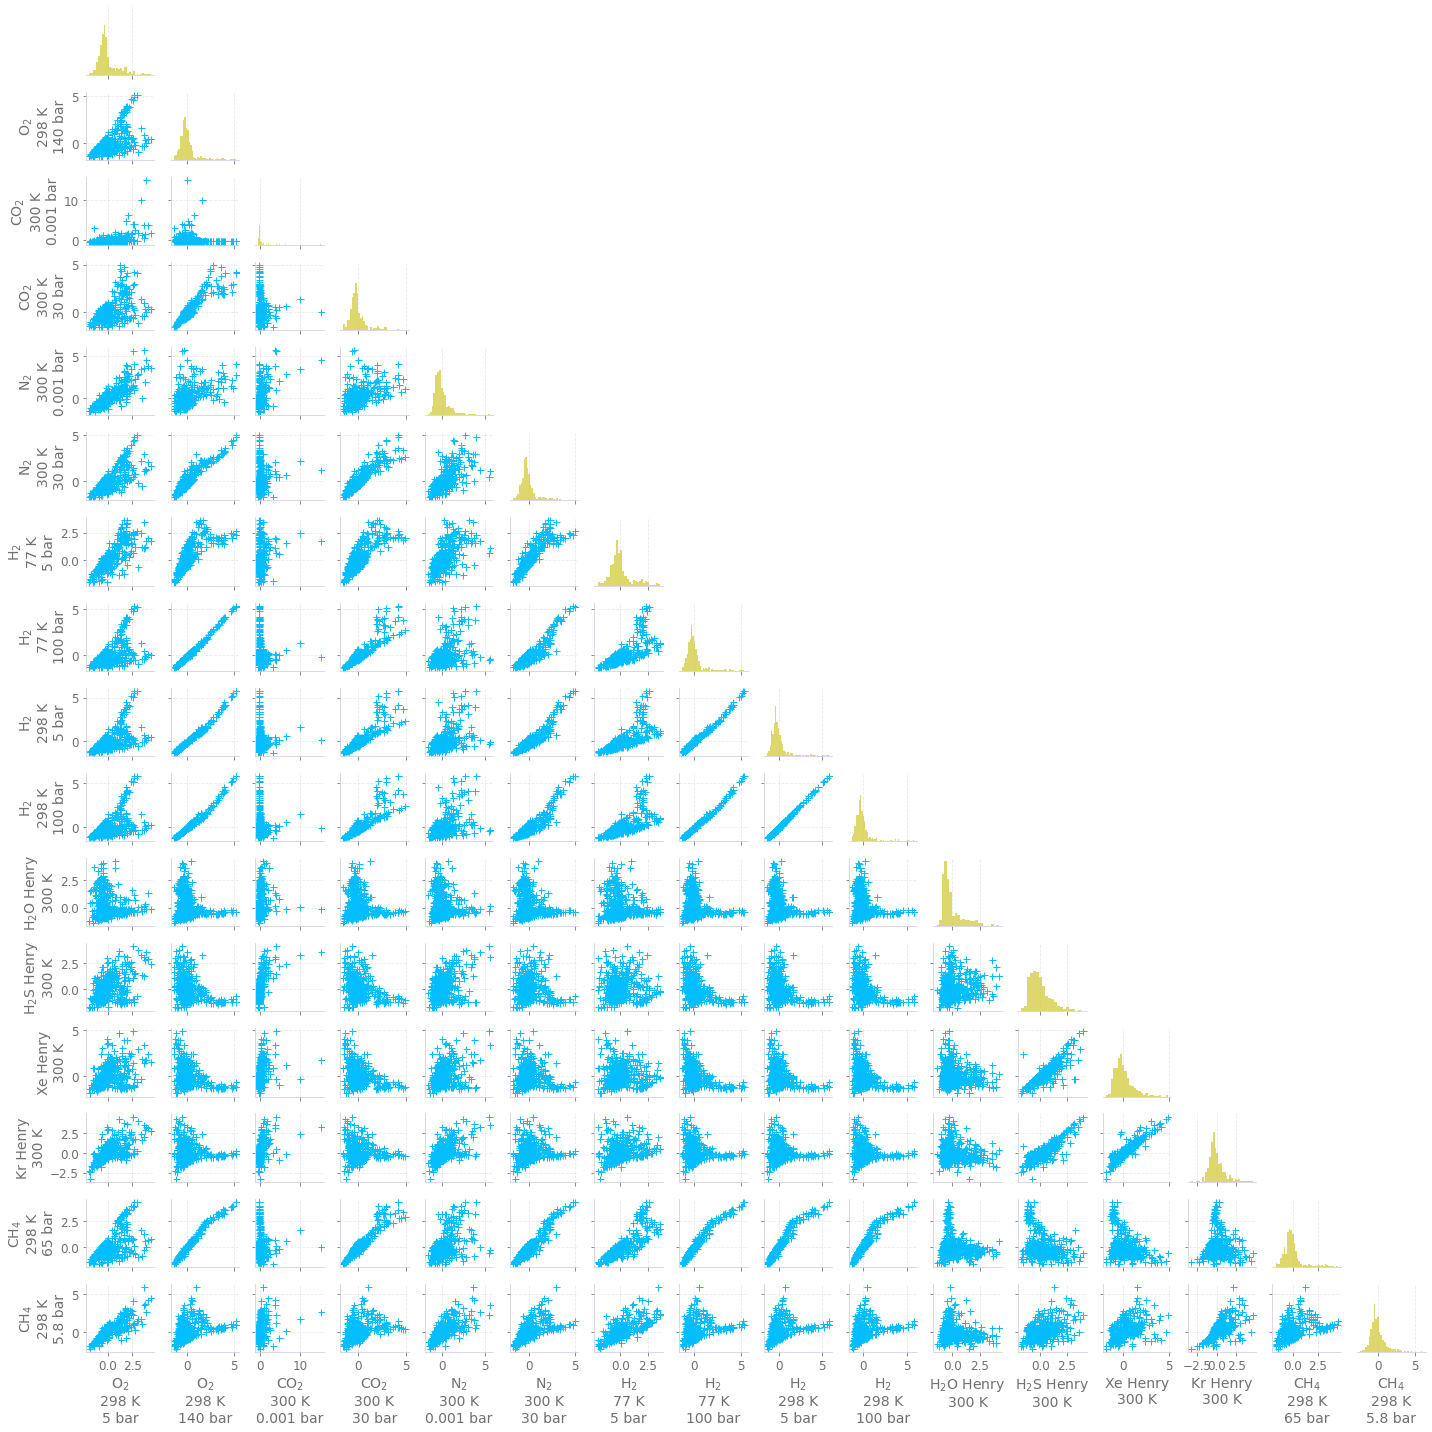

In [7]:
g = sb.pairplot(df_p, corner=True,
                plot_kws=dict(marker="+", linewidth=1),
                diag_kws=dict(fill=True, color="C1", ec="None")
               )
g.fig.set_size_inches(20, 20)
plt.tight_layout()
plt.savefig("scatterplot_matrix.png", dpi=300, format="png")

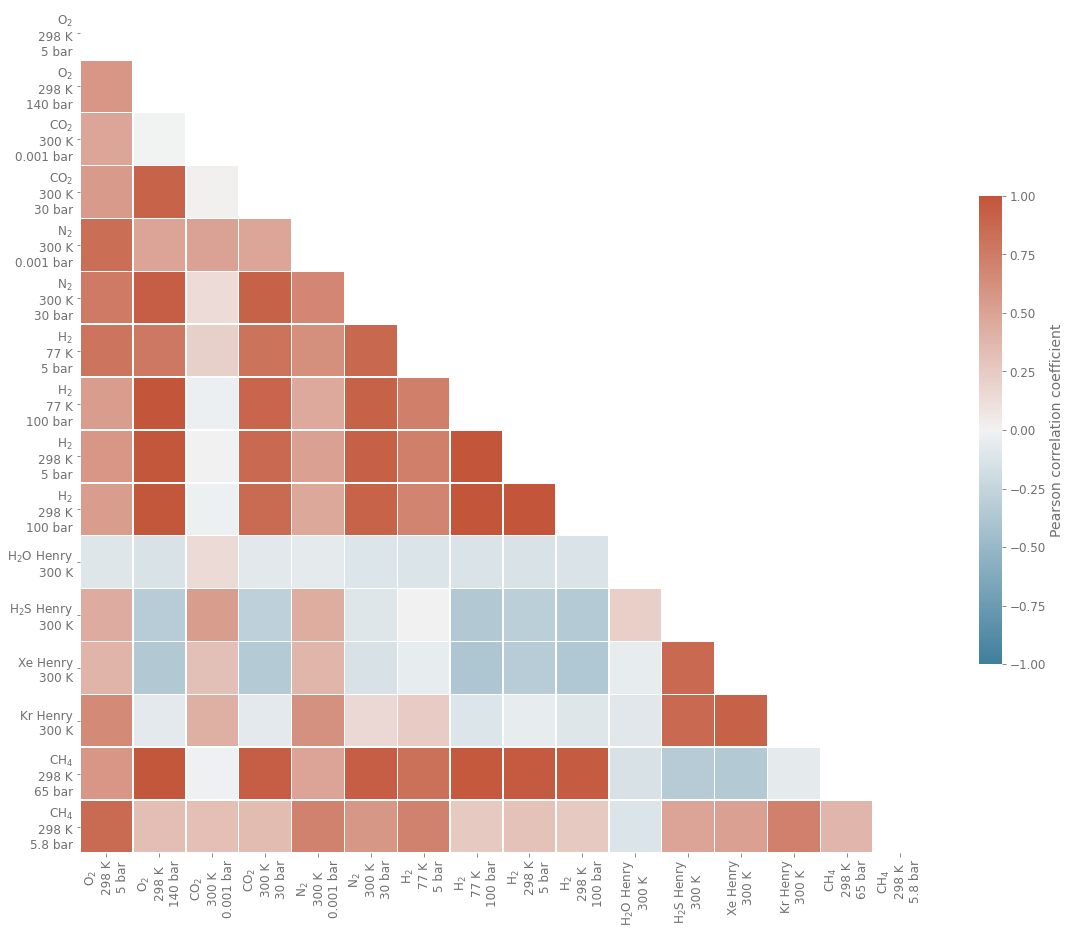

In [16]:
# Compute the correlation matrix
corr = df_p.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1.0, vmin=-1.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, 'label':'Pearson correlation coefficient'})

plt.tight_layout()
plt.savefig('corr_matrix.pdf', format='pdf')